## Data set
Titanic

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/tomaszzukowski/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def plot_count(col_name,title=None,ylabel=None):
    data.groupby(col_name).agg({'PassengerId':'count'}).plot(kind='bar');
    if title:
        plt.title(title)
    if ylabel:
        plt.ylabel(ylabel)
        
    
def tab_count_surv(col_name):
    return data.groupby(col_name).agg({'PassengerId':'count','Survived':np.mean})
    
def chi2_pvalue(col_name):
    return 'P-value: ' + str(chi2_contingency(data.groupby(col_name).agg({'PassengerId':'count','Survived':np.sum})\
                                              .values)[1])

In [3]:
data = pd.read_csv('./data/titanic-data.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.shape

(891, 12)

There are data about 891 passengers.
Data set contains information about survival, class, name, sex, age, number of siblings/spouses aboard, number of parents/children aboard, fare, cabin and port in which passenger embarked.

## Data manipulation
I would like to recalculate some variables to obtain
- total number of family members aboard
- indicator variables about having family, parents/chidren, siblings/spouse aboard
- indicator variable of missing values in Cabin

## Questions
Main question I would like to answer is if there are any indicators allowing to predict survival. I would like also check some interactions between variables (ie. age and parch). I will also check if relations which shouldn't be present in dataset (like embarkment port and survival) are really missing.

## Disclaimer
As this is only exploratory analysis most of the results will not be statistically tested for significance

In [6]:
data['family']=data['SibSp']+data['Parch']

In [7]:
data['has_family']=data['family'].apply(lambda x: 1 if x>0 else 0)

In [8]:
data['has_Parch']=data['Parch'].apply(lambda x: 1 if x>0 else 0)

In [9]:
data['has_SibSp']=data['SibSp'].apply(lambda x: 1 if x>0 else 0)

In [10]:
data['has_cabin']=data['Cabin'].apply(lambda x: 1 if str(x)!='nan' else 0)

In [11]:
data.describe()

/Users/tomaszzukowski/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,family,has_family,has_Parch,has_SibSp,has_cabin
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602,0.397306,0.239057,0.317621,0.228956
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459,0.489615,0.426747,0.465813,0.420397
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,1.000000,1.000000,1.000000,1.000000


On average 38% passengers survived. Considered passengers age is on average 29.7.
About 40% has family on board. For almost 80% we do not have data about having cabin. Avarage fare is 32, but median is only 14.5 what suggest skewed distribution. Data values seems to be OK. I assume that passengers with fare equal to zero are crew.

In [12]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,family,has_family,has_Parch,has_SibSp,has_cabin
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.040143,-0.057462,0.005167,-0.053397,0.019919
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639,0.203367,0.147408,0.115867,0.316912
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997,-0.135207,-0.027526,-0.076009,-0.725541
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914,-0.198270,-0.280626,-0.162893,0.249732
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712,0.584471,0.462241,0.695562,-0.040460
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111,0.583398,0.845092,0.356133,0.036987
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138,0.271832,0.237717,0.192190,0.482075
family,-0.040143,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000,0.690922,0.738120,0.653311,-0.009175
has_family,-0.057462,0.203367,-0.135207,-0.198270,0.584471,0.583398,0.271832,0.690922,1.000000,0.690336,0.840286,0.158029
has_Parch,0.005167,0.147408,-0.027526,-0.280626,0.462241,0.845092,0.237717,0.738120,0.690336,1.000000,0.420233,0.089136


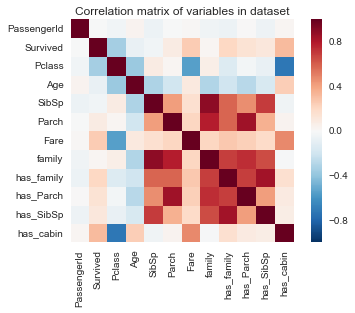

In [13]:
sns.heatmap(data.corr(),square = True)
sns.plt.title('Correlation matrix of variables in dataset');

It seems that survival is correlated with Fare, Pclass, having cabin, but also with having family on board. Correlation with having parents/children seems to be higher than with having siblings/spouse. Also Fare, Pclass and having cabin has rather high correlation between each other. In the next step I am going to statistically test significance of these correlations.

In [14]:
for x in data.drop(['PassengerId','Survived'],axis=1).columns[data.drop(['PassengerId','Survived'],\
                                                                        axis=1).dtypes!='O']:
    cor = pearsonr(data.ix[data[x].notnull(),'Survived'],data.ix[data[x].notnull(),x])
    print x, 'Corr:', cor[0], 'p-value:', cor[1]

Pclass Corr: -0.338481035961 p-value: 2.53704738798e-25
Age Corr: -0.0772210945722 p-value: 0.0391246540135
SibSp Corr: -0.0353224988857 p-value: 0.292243928698
Parch Corr: 0.0816294070835 p-value: 0.0147992453747
Fare Corr: 0.257306522385 p-value: 6.12018934192e-15
family Corr: 0.0166389892827 p-value: 0.619891122134
has_family Corr: 0.2033670857 p-value: 9.00949017933e-10
has_Parch Corr: 0.147407500432 p-value: 9.96011723721e-06
has_SibSp Corr: 0.115867498622 p-value: 0.000529396259441
has_cabin Corr: 0.316911523112 p-value: 3.09089103965e-22


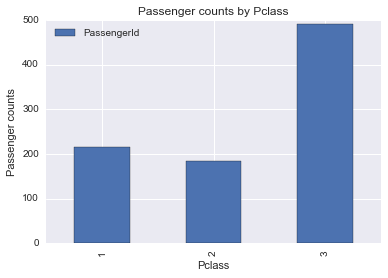

In [15]:
plot_count('Pclass',title='Passenger counts by Pclass',ylabel='Passenger counts')

In [16]:
tab_count_surv('Pclass')

,PassengerId,Survived
Pclass,,
1,216,0.629630
2,184,0.472826
3,491,0.242363


In [17]:
chi2_pvalue('Pclass')

'P-value: 2.72372604422e-10'

The higher class the higher survival rate. Differences between class are statistically significant due to chi2 test. From above charts we can also see that most of passengers was in 3rd class

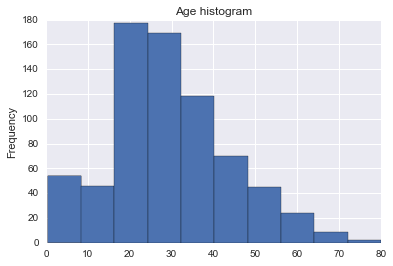

In [18]:
data['Age'].plot(kind='hist',title='Age histogram')

We can observe that mostly 20-40 years old people were traveling by Titanic. In addition some of them had young
children with them.

In [19]:
data['age_bin']=pd.cut(data['Age'],bins=[0,5,10,20,30,40,50,60,100])

In [20]:
tab_count_surv('age_bin')

,PassengerId,Survived
age_bin,,
"(0, 5]",44,0.704545
"(5, 10]",20,0.350000
"(10, 20]",115,0.382609
"(20, 30]",230,0.365217
"(30, 40]",155,0.445161
"(40, 50]",86,0.383721
"(50, 60]",42,0.404762
"(60, 100]",22,0.227273


As difference is visible only for chldren below 5 years I will recalculate bins

In [21]:
data['age_bin']=pd.cut(data['Age'],bins=[0,5,100])

In [22]:
chi2_pvalue('age_bin')

'P-value: 0.0192598421885'

Children up to five years has significantly higher survival ratio

In [23]:
data['age_bin']=pd.cut(data['Age'],bins=[0,1,2,3,4,5,10,20,30,40,50,60,100])

I would like to see if there is any interaction for age and having family (I assume lower survival rate for children without family)

In [24]:
data.pivot_table(index='age_bin',columns='has_family',values='Survived',aggfunc=np.mean)

has_family,0,1
age_bin,,
"(0, 1]",NaN,0.857143
"(1, 2]",NaN,0.300000
"(2, 3]",NaN,0.833333
"(3, 4]",NaN,0.700000
"(4, 5]",1.000000,1.000000
"(5, 10]",NaN,0.350000
"(10, 20]",0.276923,0.520000
"(20, 30]",0.324841,0.452055
"(30, 40]",0.380435,0.539683


Most of young children (below 10 years old) traveled with family. For people older than ten years in almost all categories having family was increasing survival ratio.

In [25]:
tab_count_surv('has_family')

,PassengerId,Survived
has_family,,
0,537,0.303538
1,354,0.505650


In [26]:
chi2_pvalue('has_family')

'P-value: 8.25218984183e-05'

And we can see that having family was significantly increasing survival ratio.

I would like to have equal bins for fare, so I calculate percentiles excluding zeros

In [27]:
data.ix[data['Fare']>0,'Fare'].describe(percentiles=[0,.2,.4,.6,.8,1])

count    876.000000
mean      32.755650
std       49.936826
min        4.012500
0%         4.012500
20%        7.895800
40%       11.133300
50%       14.500000
60%       23.000000
80%       40.125000
100%     512.329200
max      512.329200
Name: Fare, dtype: float64

In [28]:
data['Fare_bin']=pd.cut(data['Fare'],bins=[0,4.01,7.89,11.13,23,40.125,513],right=False)

In [29]:
tab_count_surv('Fare_bin')

,PassengerId,Survived
Fare_bin,,
"[0, 4.01)",15,0.066667
"[4.01, 7.89)",170,0.247059
"[7.89, 11.13)",179,0.184358
"[11.13, 23)",175,0.434286
"[23, 40.125)",176,0.437500
"[40.125, 513)",176,0.642045


In [30]:
chi2_pvalue('Fare_bin')

'P-value: 7.73262935071e-09'

Survival significantly depends on fare paid for travel. There is only one exception - first non zero category has higher survival rate then following one. It is probably effect of some kind of interaction

I am recalculating again age bins to compare it with fare bins.

In [31]:
data['age_bin']=pd.cut(data['Age'],bins=[0,10,20,30,40,50,60,100])

Below table shows fraction of age bins per fare bin. Rows sums up to 1.

In [32]:
data.pivot_table(index='Fare_bin',columns='age_bin',values='PassengerId',aggfunc='count').div(
data.pivot_table(index='Fare_bin',columns='age_bin',values='PassengerId',aggfunc='count').sum(axis=1),axis=0)

age_bin,"(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 100]"
Fare_bin,,,,,,,
"[0, 4.01)",NaN,0.142857,0.142857,0.571429,0.142857,NaN,NaN
"[4.01, 7.89)",NaN,0.247788,0.469027,0.132743,0.088496,0.026549,0.035398
"[7.89, 11.13)",0.013889,0.229167,0.402778,0.229167,0.076389,0.020833,0.027778
"[11.13, 23)",0.155405,0.141892,0.351351,0.209459,0.094595,0.047297,NaN
"[23, 40.125)",0.220000,0.086667,0.166667,0.220000,0.166667,0.086667,0.053333
"[40.125, 513)",0.039474,0.125000,0.269737,0.256579,0.164474,0.105263,0.039474


In [33]:
data.pivot_table(index='Fare_bin',columns='age_bin',values='Survived',aggfunc=np.mean)

age_bin,"(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 100]"
Fare_bin,,,,,,,
"[0, 4.01)",NaN,0.000000,1.000000,0.000000,0.000000,NaN,NaN
"[4.01, 7.89)",NaN,0.285714,0.264151,0.066667,0.000000,0.000000,0.000000
"[7.89, 11.13)",0.500000,0.303030,0.155172,0.181818,0.363636,0.000000,0.500000
"[11.13, 23)",0.826087,0.333333,0.365385,0.451613,0.285714,0.142857,NaN
"[23, 40.125)",0.454545,0.538462,0.560000,0.484848,0.400000,0.384615,0.125000
"[40.125, 513)",0.500000,0.631579,0.658537,0.820513,0.600000,0.687500,0.333333


There is overrepresentation of young and healthy people(20-30 years old) in lowest non zero fare group and it can be cause of higher survival rate there. I assume it can be some kind of "special" group there as their survival ratio is very high for this fare class.

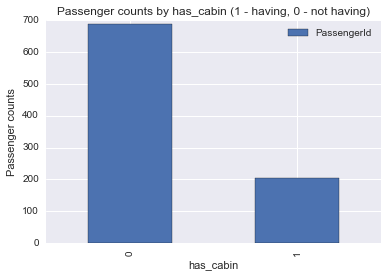

In [34]:
plot_count('has_cabin',title='Passenger counts by has_cabin (1 - having, 0 - not having)',ylabel='Passenger counts')

In [35]:
tab_count_surv('has_cabin')

,PassengerId,Survived
has_cabin,,
0,687,0.299854
1,204,0.666667


In [36]:
chi2_pvalue('has_cabin')

'P-value: 4.5326414002e-09'

Having cabin also significantly improve survival ratio, but we have to remember it is correlated also with wealth (defined by paid fare and Pclass)

In [37]:
tab_count_surv('Embarked')

,PassengerId,Survived
Embarked,,
C,168,0.553571
Q,77,0.389610
S,644,0.336957


In [38]:
chi2_pvalue('Embarked')

'P-value: 0.00430972718296'

In [39]:
data.pivot_table(index='Fare_bin',columns='Embarked',values='PassengerId',aggfunc='count')

Embarked,C,Q,S
Fare_bin,,,
"[0, 4.01)",NaN,NaN,15.0
"[4.01, 7.89)",29.0,51.0,90.0
"[7.89, 11.13)",8.0,3.0,168.0
"[11.13, 23)",36.0,11.0,128.0
"[23, 40.125)",27.0,10.0,139.0
"[40.125, 513)",68.0,2.0,104.0


Cherbourg has highest survival ratio, what shouldn't occur. It is probably caused by higher ratio of wealthy people embarking there.

## Summary
Data set contains information about 891 passengers which are described by a few variables. Data set contains missing value in 'age' variable. Passengers without age in dataset is omitted when age is used in analysis. There are also some 'zero' values in fare variable. It is assumed these records are crew.
It would be useful to have Parch variable splited into two - Parents/Children. Also variables about swimming ablitity or other health characteristics could be useful in predicting survival.
It is important to remember that in this analysis only correlation is analyzed. There is no info about causation. It is also risk of spurious correlation which probably occured between embarkment port and survival.
Survival seems to depend mostly on wealth of passenger (Pclads, fare and having cabin) and on having family. Age in total seems to be not so important. Only children younger than 5 years seems to have higher survival rate.

In [42]:
x = np.array([[0,1],[2,3]])

In [43]:
x

array([[0, 1],
       [2, 3]])

In [44]:
x[0]

array([0, 1])

In [45]:
x[:,0]

array([0, 2])